# Classificação de Texto e Análise de Sentimentos

- Base de dados: www.kaggle.com/sid321axn/amazon-alexa-reviews

Base de dados contendo 3000 reviews de clientes da Amazon sobre produtos da Alexa

O objetivo é descobrir insights nos reviews para aplicarmos análise de sentimento nos textos

<img src=img/analise_sentimento.png>

## Tokenização

<img src=img/tokenizacao.png>


# Etapa 1: Importação das bibliotecas

In [1]:
# descomentar para google colab
# %tensorflow_version 2.x

import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
tf.__version__

C:\Users\ricar\AppData\Roaming\Python\Python37\site-packages\requests\__init__.py:91: RequestsDependencyWarning: urllib3 (1.25.9) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)
C:\Users\ricar\AppData\Roaming\Python\Python37\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ricar\AppData\Roaming\Python\Python37\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ricar\AppData\Roaming\Python\Python37\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1

'2.3.0'

# Etapa 2: Importação da base de dados

In [129]:
df_alexa = pd.read_csv('amazon-alexa.tsv', sep = '\t')

In [3]:
df_alexa.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [5]:
df_alexa.keys()
# rating é a nota
# date é a data
# variation que é a categoria do produto
# verified_reviews daqui iremos realizar as extrações dos textos
# feedback 1 é positivo

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')

In [6]:
df_alexa.tail(10)

,rating,date,variation,verified_reviews,feedback
3140,4,30-Jul-18,White Dot,Barry,1
3141,3,30-Jul-18,Black Dot,,1
3142,4,30-Jul-18,White Dot,My three year old loves it. Good for doing ba...,1
3143,5,30-Jul-18,Black Dot,Awesome device wish I bought one ages ago.,1
3144,5,30-Jul-18,Black Dot,love it,1
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1
3149,4,29-Jul-18,Black Dot,Good,1


In [7]:
df_alexa['verified_reviews']

0                                           Love my Echo!
1                                               Loved it!
2       Sometimes while playing a game, you can answer...
3       I have had a lot of fun with this thing. My 4 ...
4                                                   Music
                              ...                        
3145    Perfect for kids, adults and everyone in betwe...
3146    Listening to music, searching locations, check...
3147    I do love these things, i have them running my...
3148    Only complaint I have is that the sound qualit...
3149                                                 Good
Name: verified_reviews, Length: 3150, dtype: object

# Etapa 3: Visualização dos dados

In [130]:
positive = df_alexa[df_alexa['feedback'] == 1]

In [131]:
positive

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [132]:
negative = df_alexa[df_alexa['feedback'] == 0]

In [12]:
negative

,rating,date,variation,verified_reviews,feedback
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0
...,...,...,...,...,...
3047,1,30-Jul-18,Black Dot,Echo Dot responds to us when we aren't even ta...,0
3048,1,30-Jul-18,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0
3067,2,30-Jul-18,Black Dot,The only negative we have on this product is t...,0
3091,1,30-Jul-18,Black Dot,I didn’t order it,0


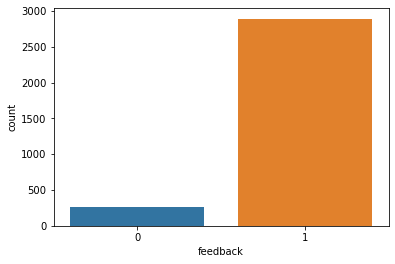

In [13]:
# 1 é a quantidade positiva 
# 0 é a quantidade negativa
sns.countplot(df_alexa['feedback'], label = 'Count');

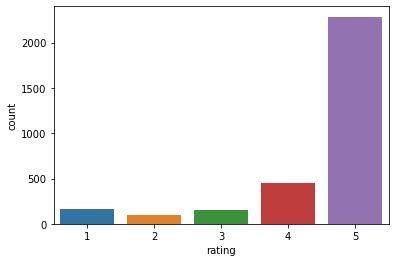

In [18]:
# 1,2,3,4,5 são as notas
sns.countplot(x = 'rating', data = df_alexa);

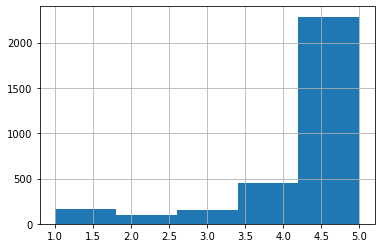

In [19]:
# bins = 5 porque são 5 tipos de notas
df_alexa['rating'].hist(bins = 5);

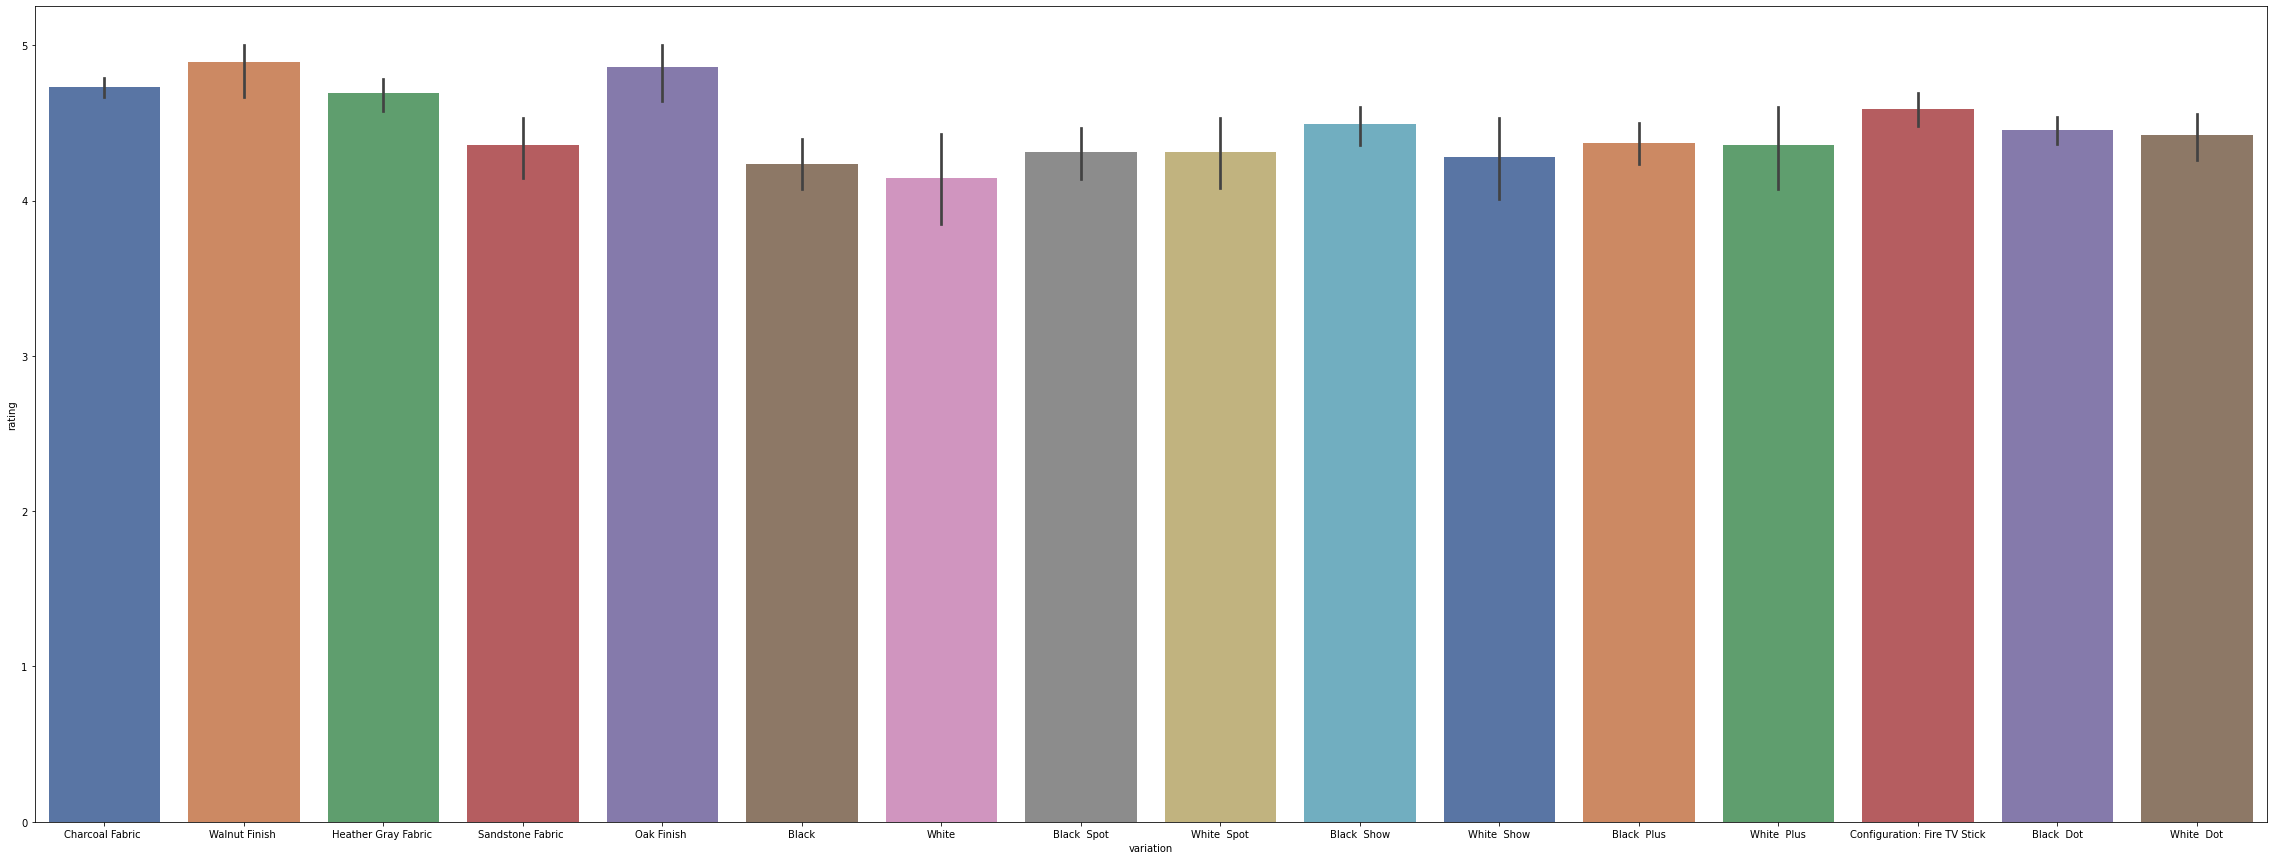

In [26]:
# variation é a categoria do produto
# rating é a nota
plt.figure(figsize = (40,15))
sns.barplot(x = 'variation', y = 'rating', data = df_alexa, palette = 'deep');

# Etapa 4: Limpeza dos dados 

In [133]:
df_alexa = df_alexa.drop(['date', 'rating'], axis = 1)

In [42]:
df_alexa.head()

,variation,verified_reviews,feedback
0,Charcoal Fabric,Love my Echo!,1
1,Charcoal Fabric,Loved it!,1
2,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,Charcoal Fabric,Music,1


In [134]:
# Poderíamos usar também OneHotEncoder
variation_dummies = pd.get_dummies(df_alexa['variation'])

In [44]:
variation_dummies

,Black,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [135]:
df_alexa.drop(['variation'], axis = 1, inplace=True)

In [46]:
df_alexa.head()

,verified_reviews,feedback
0,Love my Echo!,1
1,Loved it!,1
2,"Sometimes while playing a game, you can answer...",1
3,I have had a lot of fun with this thing. My 4 ...,1
4,Music,1


In [136]:
df_alexa = pd.concat([df_alexa, variation_dummies], axis = 1)

In [49]:
df_alexa.head()

,verified_reviews,feedback,Black,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,Love my Echo!,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Loved it!,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,"Sometimes while playing a game, you can answer...",1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,I have had a lot of fun with this thing. My 4 ...,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Music,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


# Exemplo de tokenização


In [1]:
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
sample_data = ['Este é o primeiro documento.',
               'Este documento é o segundo documento.',
               'E este é o terceiro.',
               'Este é o primeiro documento?']

In [3]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)

In [4]:
print(vectorizer.get_feature_names())

['documento', 'este', 'primeiro', 'segundo', 'terceiro']


In [5]:
print(X.toarray())

[[1 1 1 0 0]
 [2 1 0 1 0]
 [0 1 0 0 1]
 [1 1 1 0 0]]


# Tokenização da base de dados

In [145]:
from sklearn.feature_extraction.text import CountVectorizerorizer
vectorizer = CountVectorizer()
alexa_countvectorizer = vectorizer.fit_transform(df_alexa['verified_reviews'])

In [146]:
alexa_countvectorizer.shape

(3150, 4044)

In [147]:
type(alexa_countvectorizer)

scipy.sparse.csr.csr_matrix

In [148]:
print(vectorizer.get_feature_names())

['00', '000', '07', '10', '100', '100x', '11', '1100sf', '12', '129', '12am', '15', '150', '18', '19', '1964', '1990', '1gb', '1rst', '1st', '20', '200', '2000', '2017', '229', '23', '24', '25', '29', '2nd', '2package', '30', '300', '30pm', '34', '360', '39', '3rd', '3x', '3xs', '40', '45', '48', '4am', '4ghz', '4k', '4th', '50', '54', '5am', '5ghz', '5th', '600', '62', '672', '6th', '70', '75', '79', '80', '80s', '81', '83', '85', '88', '888', '8gb', '90', '91', '911', '99', '_specifically_', 'a1', 'a19', 'abay', 'abc', 'abd', 'abilities', 'ability', 'able', 'abode', 'about', 'above', 'absolutely', 'absolutly', 'ac', 'accent', 'acceptable', 'accepting', 'access', 'accessable', 'accessible', 'accessing', 'accessories', 'accesss', 'accident', 'accidentally', 'accompanying', 'accomplish', 'accomplished', 'according', 'accordingly', 'account', 'accounts', 'accuracy', 'accurate', 'accurately', 'accustom', 'acknowledge', 'acoustical', 'across', 'act', 'acting', 'action', 'actions', 'activat

In [75]:
print(alexa_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [76]:
df_alexa.drop(['verified_reviews'], axis = 1, inplace=True)

In [78]:
df_alexa.head()

,feedback,Black,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [79]:
reviews = pd.DataFrame(alexa_countvectorizer.toarray())

In [80]:
reviews.head()

,0,1,2,3,4,5,6,7,8,9,...,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
df_alexa = pd.concat([df_alexa, reviews], axis = 1)

In [83]:
df_alexa.head()

,feedback,Black,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,...,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
X = df_alexa.drop(['feedback'], axis = 1)

In [89]:
X

,Black,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,...,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3146,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3147,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
y = df_alexa['feedback']

In [91]:
y

0       1
1       1
2       1
3       1
4       1
       ..
3145    1
3146    1
3147    1
3148    1
3149    1
Name: feedback, Length: 3150, dtype: int64

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [93]:
X_train.shape

(2520, 4060)

In [94]:
X_test.shape

(630, 4060)

# Etapa 5: Construção e treinamento do modelo

In [95]:
# entrada -> camada oculta -> camada oculta -> saída
# 4060    ->      400      ->      400      -> 1
# Modelo sequencial com uma sequência de camadas
classifier = tf.keras.models.Sequential()

# input_shape será colocado apenas para a primeira camada que irão identificar os neurônios da camada de entrada
# units = 400 irá identificar 400 neurônios na camada oculta
# função de ativação relu
classifier.add(tf.keras.layers.Dense(units = 400, activation='relu', input_shape=(4060,)))

# units = 400 irá identificar 400 neurônios na camada oculta
# função de ativação relu
classifier.add(tf.keras.layers.Dense(units = 400, activation='relu'))

# units = 1 irá identificar 1 neurônio na camada de saída
# função de ativação sigmoid
# sigmoid na saída porque queremos identificar uma probabilidade de ser zero ou um.
# Quanto mais próximo de zero o texto é negativo e quanto mais próximo de um é positivo
# Obervação: a saída em um problema de regressão linear usamos a função de ativação linear como fizemos no aluguel de bikes
classifier.add(tf.keras.layers.Dense(units = 1, activation='sigmoid'))

In [97]:
classifier.summary()
# verifique que esta rede possuirá 1,785,201 parâmetros que a rede irá treinar incluindo os pesos e as unidades de bias

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 400)               1624400   
_________________________________________________________________
dense_1 (Dense)              (None, 400)               160400    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 401       
Total params: 1,785,201
Trainable params: 1,785,201
Non-trainable params: 0
_________________________________________________________________


In [98]:
# como é um problema de classificação em loss usaremos binary_crossentropy usamos binary porque é um problema
# de classificação com duas classes
# crossentropy é muito utilizado em modelos de deep learning que deixa a execução mais rápida que mean squared error e 
# e crossentropy usa o conceito de logaritmo

# a métrica para avaliação usaremos accuracy 
classifier.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [99]:
epochs_hist = classifier.fit(X_train, y_train, epochs=10)

Epoch 1/10
79/79 [==============================] - 1s 7ms/step - loss: 0.2657 - accuracy: 0.9127
Epoch 2/10
79/79 [==============================] - 1s 7ms/step - loss: 0.0802 - accuracy: 0.9655
Epoch 3/10
79/79 [==============================] - 1s 6ms/step - loss: 0.0295 - accuracy: 0.9913
Epoch 4/10
79/79 [==============================] - 1s 7ms/step - loss: 0.0191 - accuracy: 0.9944
Epoch 5/10
79/79 [==============================] - 1s 6ms/step - loss: 0.0168 - accuracy: 0.9940
Epoch 6/10
79/79 [==============================] - 1s 7ms/step - loss: 0.0162 - accuracy: 0.9948
Epoch 7/10
79/79 [==============================] - 1s 7ms/step - loss: 0.0150 - accuracy: 0.9948
Epoch 8/10
79/79 [==============================] - 1s 7ms/step - loss: 0.0151 - accuracy: 0.9937
Epoch 9/10
79/79 [==============================] - 1s 7ms/step - loss: 0.0156 - accuracy: 0.9948
Epoch 10/10
79/79 [==============================] - 1s 7ms/step - loss: 0.0148 - accuracy: 0.9937


# Etapa 6: Avaliação do modelo 

In [110]:
from sklearn.metrics import classification_report, confusion_matrix

In [111]:
y_pred_train = classifier.predict(X_train)
y_pred_train

array([[1.        ],
       [0.99999756],
       [1.        ],
       ...,
       [1.        ],
       [0.99984723],
       [0.99999714]], dtype=float32)

In [102]:
y_pred_train = (y_pred_train > 0.5)
y_pred_train

array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [103]:
cm = confusion_matrix(y_train, y_pred_train)
cm

array([[ 186,   12],
       [   1, 2321]], dtype=int64)

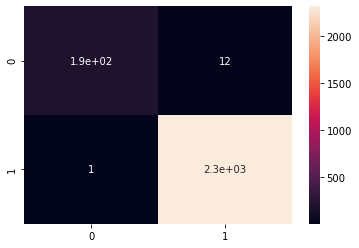

In [104]:
sns.heatmap(cm, annot=True);

In [105]:
y_pred_test = classifier.predict(X_test)
y_pred_test = (y_pred_test > 0.5)
cm = confusion_matrix(y_test, y_pred_test)
cm

array([[ 18,  41],
       [  6, 565]], dtype=int64)

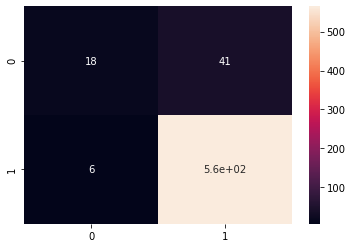

In [106]:
sns.heatmap(cm, annot=True);

In [107]:
epochs_hist.history.keys()

dict_keys(['loss', 'accuracy'])

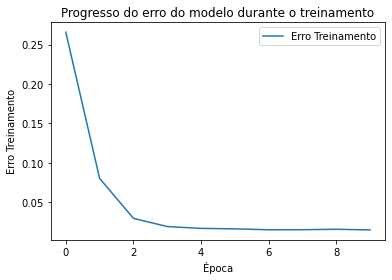

In [112]:
plt.plot(epochs_hist.history['loss'])
plt.title('Progresso do erro do modelo durante o treinamento')
plt.xlabel('Época')
plt.ylabel('Erro Treinamento')
plt.legend(['Erro Treinamento'])

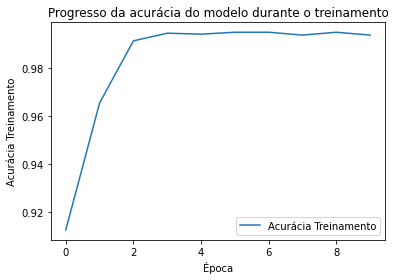

In [114]:
plt.plot(epochs_hist.history['accuracy'])
plt.title('Progresso da acurácia do modelo durante o treinamento')
plt.xlabel('Época')
plt.ylabel('Acurácia Treinamento')
plt.legend(['Acurácia Treinamento'])